In [85]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from math import log2

## Task 1: Playing with Pseudo-Randomness

### Part A: Implement and Benchmark an LCG

In [ ]:
def Linear_Congruential_Generator(seed, multiplier, increment, modulus, N_steps):
    """
    Generate a sequence using a Linear Congruential Generator (LCG).

    Parameters:
        seed (int): Initial value (X_0) of the sequence.
        multiplier (int): The multiplier 'a' in the LCG recurrence.
        increment (int): The increment 'c' in the LCG recurrence.
        modulus (int): The modulus 'm' to ensure wrap-around.
        N_steps (int): Number of LCG iterations to compute.

    Returns:
        List[int]: The list/array of LCG outputs, including the initial seed.
    """
    sequence = [seed]  # Initialize with the seed value

    for i in range(N_steps):
        # Compute the next value in the sequence using the LCG formula and append it to the sequence array
        X_n = (multiplier * sequence[i] + increment) % modulus
        sequence.append(X_n)

    return sequence

#### Demonstrating a Full-Period LCG
<small> According to the Hull-Dobell Theorem, a linear congruential generator (LCG) will have a full period (i.e., cycle through all possible values modulo `m` before repeating) if:
1. `c` and `m` are coprime,
2. `a - 1` is divisible by all prime factors of `m`,
3. If `m` is divisible by 4, then `a - 1` must also be divisible by 4.

We choose:
- `a = 5`
- `c = 1`
- `m = 16`
- `seed = 2`

This setup satisfies the Hull-Dobell Theorem, and we expect the generator to cycle through all 16 values before repeating.

In [ ]:
"""
Full-period LCG satisfying the Hull-Dobell Theorem
# Parameters:
# seed = 2 (any integer < m)
# a = 5, c = 1, m = 16 
This will generate a full cycle before repeating
"""

output = Linear_Congruential_Generator(seed=2, multiplier=5, increment=1, modulus=16, N_steps=17) # N_steps = 17 shows periodicity
print("LCG output:", output)

LCG output: [2, 11, 8, 9, 14, 7, 4, 5, 10, 3, 0, 1, 6, 15, 12, 13, 2, 11]


#### Job: Run the LCG for at least 10⁶ steps
<small> To analyze long-term behavior, we generate a sequence using the Linear Congruential Generator for 10^6 steps. We use the previously determined parameters that satisfy the Hull-Dobell Theorem (a = 5, c = 1, m = 16) to ensure full-period behavior over the modulus.

In [ ]:
# Run LCG for a long sequence of 10^6 steps using full-period parameters
seed = 2
a = 5
c = 1
m = 16
N = 10**6

lcg_long_seq = Linear_Congruential_Generator(seed, a, c, m, N)

#### Job: Visualize the Distribution of LCG Outputs

<small>We generate a histogram of the output values from the LCG after 10^6 steps. This helps assess whether the values are uniformly distributed over the modulus range, which is a key property for evaluating the quality of PRNGs.

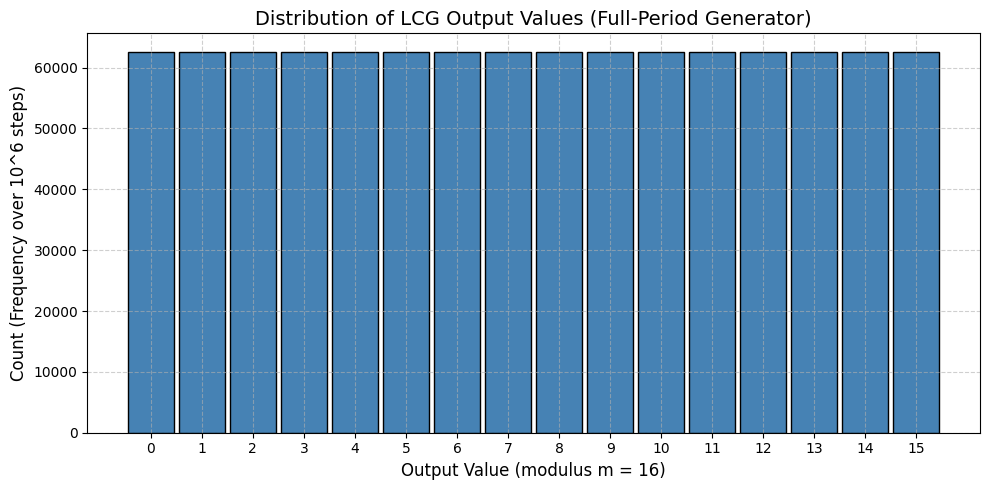

In [93]:
# Parameters (satisfying Hull-Dobell for full period)
seed = 2
a = 5
c = 1
m = 16
N = 10**6

# Generate the sequence
sequence = Linear_Congruential_Generator(seed, a, c, m, N)

# Plot histogram of output values from the LCG
plt.figure(figsize=(10, 5))

plt.hist(sequence, bins=m, range=(0, m), color='steelblue', edgecolor='black', align='left', rwidth=0.9)

plt.title("Distribution of LCG Output Values (Full-Period Generator)", fontsize=14)
plt.xlabel(f"Output Value (modulus m = {m})", fontsize=12)
plt.ylabel("Count (Frequency over 10^6 steps)", fontsize=12)

plt.xticks(range(m))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

#### Histogram Interpretation

<small>This histogram shows the output distribution of the LCG over 10^6 steps with parameters satisfying the Hull-Dobell Theorem (HDT), ensuring a full-period generator.

- The output spans uniformly across states `0` to `m-1`, indicating good randomness and full state space coverage.
- A roughly uniform distribution confirms that outputs appear with similar frequency, desirable for a PRNG.

#### Entropy Analysis

<small> We know entropy metrics quantify the randomness and unpredictability of sequences generated by PRNGs like Linear Congruential Generators (LCGs).

- **Shannon Entropy** measures the average uncertainty in the output distribution, indicating how uniformly the values are spread.
- **Min Entropy** captures the worst-case predictability, revealing if some values occur more frequently and reduce randomness.

By analyzing how these entropy values evolve over many steps, we assess the quality and strength of the LCG with given parameters. This helps identify weaknesses like short periods, patterns, or biases that compromise randomness, this is crucial for applications requiring secure or high-quality randomness.

We first define a function that calculated both the Shannon and Min Entropy of a Probability Distribution and then we compute the entropy at regular intervals over a large sample size to benchmark the LCG's performance effectively.

In [ ]:
def compute_entropy(X, method='shannon'):
    
    """
    Compute entropy (Shannon or Min) of a distribution.
    
    Parameters:
    - X: array-like or dict
        Can be:
            - NumPy array of outcomes
            - Dict of {outcome: probability}
                a (key, value) pair represents an outcome x and its probability P(X = x)
    - method: 'shannon' or 'min'
    
    Returns:
    - Entropy value
    """

    if isinstance(X, dict):
        # Already a probability distribution
        values = np.array(list(X.values()))
    
    else:
        # Assume array-like sample
        X = np.array(X)
        _, counts = np.unique(X, return_counts=True) 
        values = counts / counts.sum()  # Normalize to probabilities

    # Remove zero probabilities to avoid log(0)
    values = values[values > 0]

    if method == 'shannon':
        return -np.sum(values * np.log2(values))
    
    elif method == 'min':
        return -np.log2(np.max(values))
    
    else:
        raise ValueError("Method must be 'shannon' or 'min'")

#### Entropy Evolution of LCG Output

<small>We fix a short seed (≤ 2^10) and generate a long LCG sequence (10^6 steps).

At regular intervals (every 1000 steps), we compute two entropy metrics from the empirical distribution of outputs so far:

- **Shannon Entropy:** Average uncertainty in the distribution, indicating overall randomness.
- **Min Entropy:** Worst-case predictability, reflecting if certain values dominate.

Plotting these entropies against iteration count reveals how randomness quality evolves as the generator produces more values.

A full-period LCG with good parameters should approach high entropy values quickly and maintain them, indicating uniform output distribution and strong randomness.

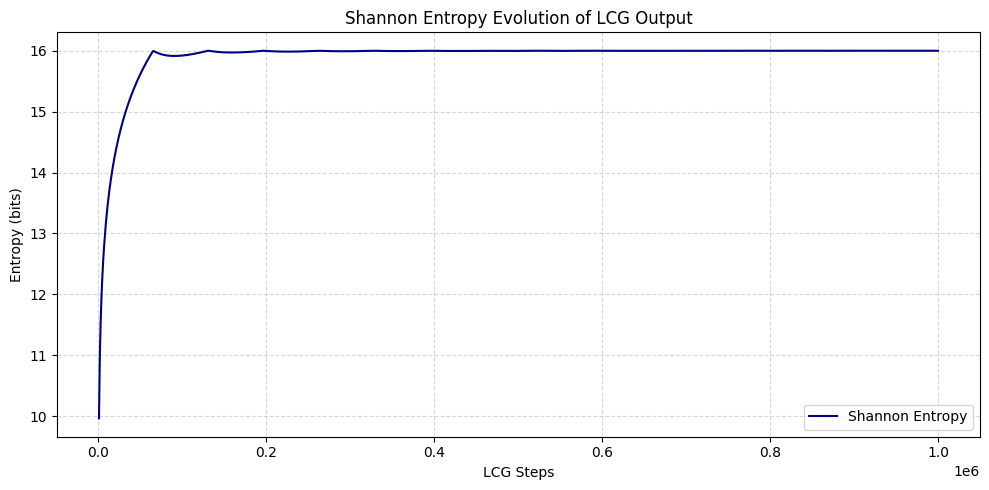

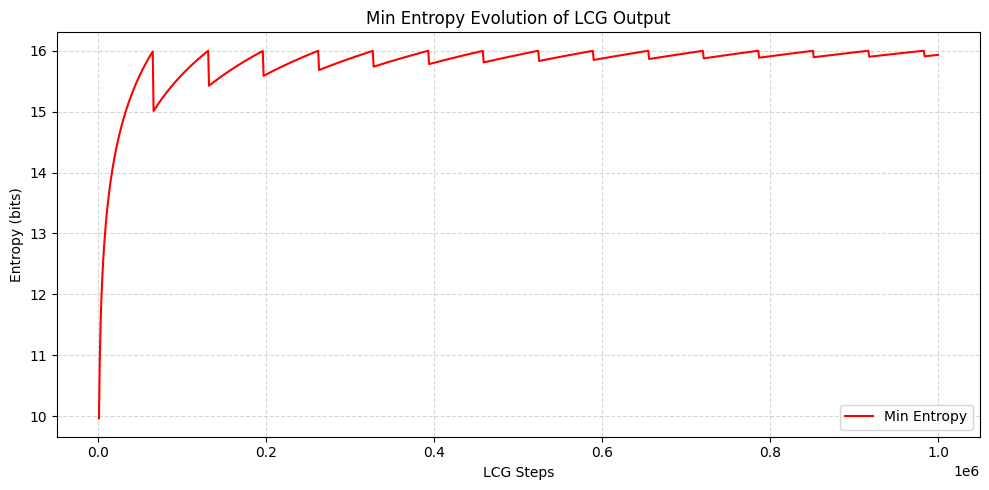

In [ ]:
# Parameters: Full-period LCG with seed ≤ 2^10
seed = 7
a, c, m = 65, 3, 2**16  # multiplier, increment, modulus
N = 10**6               # total steps
interval = 1000         # steps between entropy calculations

"""
We use these specific parameters to ensure a meaningful entropy analysis:

-> seed = 7 satisfies the task constraint (≤ 2^10 unique values).
-> m = 2^16 allows a large output space (65536 values), which is essential for
  observing evolving entropy over time. Small moduli (like m = 16) are too limited.
-> a = 65 and c = 3 satisfy the Hull-Dobell Theorem:
    -> c is coprime with m (odd vs even)
    -> a - 1 = 64 is divisible by all prime factors of m (only 2)
    -> a - 1 is also divisible by 4, since m is a power of 2
    
These choices guarantee a full-period LCG, producing high-quality pseudo-random output
for entropy tracking across 10^6 samples.
"""

# Generate LCG sequence
lcg_seq = Linear_Congruential_Generator(seed, a, c, m, N)

# Prepare lists to store entropy values and checkpoints
shannon_entropy_vals = []
min_entropy_vals = []
checkpoints = []

# Compute entropy at regular intervals over the growing sample
for i in range(interval, len(lcg_seq), interval):
    sample = lcg_seq[:i]
    H_shannon = compute_entropy(sample, method='shannon')
    H_min = compute_entropy(sample, method='min')

    shannon_entropy_vals.append(H_shannon)
    min_entropy_vals.append(H_min)
    checkpoints.append(i)

# Plot Shannon Entropy evolution
plt.figure(figsize=(10, 5))
plt.plot(checkpoints, shannon_entropy_vals, label="Shannon Entropy", color='navy')
plt.xlabel("LCG Steps")
plt.ylabel("Entropy (bits)")
plt.title("Shannon Entropy Evolution of LCG Output")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Min Entropy evolution
plt.figure(figsize=(10, 5))
plt.plot(checkpoints, min_entropy_vals, label="Min Entropy", color='red')
plt.xlabel("LCG Steps")
plt.ylabel("Entropy (bits)")
plt.title("Min Entropy Evolution of LCG Output")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

<small>
This choice of parameters has a relatively small modulus (2^16) which limits the output range to 16-bit values. The multiplier and increment are chosen as small integers. This configuration allows diving into the entropy growth and randomness quality over one million iterations (or over time).

#### Shannon Entropy Evolution of LCG Output:
<small> Observation:
- The Shannon entropy starts low and grows over time.
- It saturates near 15-16 bits, consistent with the 16-bit modulus.
- Early stages show low entropy reflecting initial predictability.

Explanation:
Because the output values are constrained to 16 bits (65536 possible values), the maximum Shannon entropy attainable is about 16 bits. The curve shows how the LCG output distribution evolves from highly predictable initial states to a more uniform distribution, increasing entropy as the sequence progresses.


#### Min Entropy Evolution of LCG Output:
<small>Observation:
- The min entropy shows more fluctuations than Shannon entropy.
- It roughly approaches but may not fully reach the maximum possible value (~16 bits).
- Drops correspond to transient clustering of outputs.

Explanation:
Min entropy is sensitive to the highest probability of any single output value. Temporary clustering or cycles cause occasional dips in min entropy. Over long iterations, the output distribution evens out, increasing min entropy toward the upper bound imposed by the modulus and hence showing that the predictability decreases.

### Part B: Implement and Benchmark AES-Based PRNGs

In [31]:
# Here is a reference implementation of the AES algorithm: https://github.com/burakozpoyraz/Advanced-Encryption-Standard/tree/master

In [32]:
# TODO: helper function to pad/truncate the seed to 16 bytes (128 bits)
def pad_seed(seed_bytes, target_len=16):
    pass  # TODO: pad or truncate the seed appropriately

# TODO: implement a simple AES-based PRNG using ECB mode
def AES_PRNG(seed, num_bytes):
    sequence = []
    pass  # TODO: implement AES-based pseudorandom generator
    return sequence

In [33]:
# TODO: choose at least 3 different seed lengths (e.g., 8, 16, 64 bits)
seed_lengths = [1, 2, 8]  # in bytes

# TODO: generate sequences of increasing length (10^5 to 10^7) for each seed length
sequence_lengths = [10**5, 10**6, 10**7]

In [34]:
# Example: Generate and store sequences
all_sequences = {}

for seed_len in seed_lengths:
    seed = np.random.bytes(seed_len)
    all_sequences[seed_len] = {}

    for seq_len in sequence_lengths:
        prng_output = AES_PRNG(seed, seq_len)
        all_sequences[seed_len][seq_len] = prng_output

In [35]:
# TODO: plot entropy across chunks of the output to study randomness
def plot_entropy(sequence, window_size=1000):
    pass  # TODO: split sequence into chunks and calculate Shannon entropy

In [36]:
# TODO: plot autocorrelation vs lag
def plot_autocorrelation(sequence, max_lag=100):
    pass  # TODO: compute autocorrelation for various lag values

In [37]:
# TODO: apply statistical tests (e.g., Chi-squared) to compare with uniform distribution
def run_statistical_tests(sequence):
    pass  # TODO: run and print p-values for randomness tests

### (BONUS) Part C: Breaking the Illusion of Randomness

### Bonus Task:
Train a light-weight model (small-neural net or decision tree) to predict the next number in your random number sequences generated from LCG and AES. Now try implementing at least one other more robust PRNGs from the list below:
- XOR-Shift Generator
- Permuted Congruential Generator (PCG) 
- SplitMix64 

In [38]:
# You may want to import these packages, though feel free to import anything else you need
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

import tensorflow as tf 
import keras 

import sklearn

ModuleNotFoundError: No module named 'tensorflow'